IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras import regularizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

2022-05-02 11:24:30.129946: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-02 11:24:30.129968: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
data = pd.read_csv('/home/aman/Documents/a.csv')
data.head(10)

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.100950
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.999400
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.849300
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.609200
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.203400
5,8.69,29,1034.6,0.0,0.0,0.0,0,0,0,449.45,...,23.63,7.10,30.47,6.92,27.90,17.28,25.088167,65.700860,197.22062,2546.081600
6,9.72,27,1034.0,0.0,0.0,0.0,0,0,0,469.92,...,25.02,6.61,29.36,6.44,26.57,12.96,36.197514,70.351498,211.21422,2270.320700
7,10.07,28,1034.1,0.0,0.0,0.0,0,0,0,436.99,...,14.74,7.63,19.29,7.52,16.70,10.80,49.073008,77.228779,223.65641,1063.830200
8,9.38,32,1033.9,0.0,0.0,0.0,0,0,0,353.33,...,6.58,10.50,5.91,10.14,6.12,11.52,62.371140,85.585411,234.50308,86.817611
9,6.54,47,1035.1,0.0,0.0,0.0,0,0,0,228.73,...,360.00,12.25,1.68,11.53,1.79,12.24,105.866560,121.463180,216.06756,9.666667


In [5]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
print(X.shape, y.shape)
y = np.reshape(y, (-1,1))
y.shape

(4213, 20) (4213,)


(4213, 1)

In [6]:
X

array([[   2.17    ,   31.      , 1035.      , ...,   58.753108,
          83.237322,  128.33543 ],
       [   2.31    ,   27.      , 1035.1     , ...,   45.408585,
          75.143041,  139.6553  ],
       [   3.65    ,   33.      , 1035.4     , ...,   32.848282,
          68.820648,  152.53769 ],
       ...,
       [   7.27    ,   90.      , 1026.3     , ...,   25.249506,
          65.827032,  197.33868 ],
       [   8.25    ,   81.      , 1025.5     , ...,   36.361161,
          70.496313,  211.30027 ],
       [   8.      ,   80.      , 1025.3     , ...,   48.452849,
          76.919574,  223.04931 ]])

In [7]:
y

array([[ 454.10095 ],
       [1411.9994  ],
       [2214.8493  ],
       ...,
       [ 158.36778 ],
       [ 126.95306 ],
       [  20.055031]])

SPLITTING TEST AND TRANING DATA

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("Training data Shape: {} {} \nTesting data Shape: {} {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))


Training data Shape: (3159, 20) (3159, 1) 
Testing data Shape: (1054, 20) (1054, 1)


SCALING THE TRAINING DATA

In [10]:
from sklearn.preprocessing import StandardScaler
# input scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# outcome scaling:
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)    
y_test = sc_y.transform(y_test)

In [11]:
X_train

array([[-0.15688663, -0.65066193,  0.32458773, ..., -1.17016507,
         0.20906612,  0.23973116],
       [-0.96299273,  1.26236489, -0.09488224, ...,  0.21285162,
         1.10270022, -0.59126299],
       [-0.01104135, -0.22554486, -1.44007902, ..., -0.78166945,
        -1.98808451, -0.32872643],
       ...,
       [ 0.08053592, -0.39559169, -0.65899702, ..., -1.39867408,
        -1.07235309, -0.0910784 ],
       [ 0.34283131, -0.90573217,  0.59941288, ..., -0.46582577,
         0.41541699,  0.76311909],
       [-0.6893915 ,  0.62468928,  1.45281728, ...,  0.28508139,
         0.20437129, -0.90996355]])

In [12]:
X_test

array([[ 0.34735364, -1.37336095,  0.58494839, ..., -0.78124559,
        -0.35197112,  0.78338018],
       [-1.93190285,  1.68748196, -0.84703527, ...,  0.34119265,
         1.11388012, -0.66875224],
       [-0.95055631,  0.28459563,  0.97548939, ...,  0.32973403,
        -0.38653881, -1.09819031],
       ...,
       [ 0.69783455, -1.37336095,  1.09120525, ..., -0.47407508,
         0.36095606,  0.77638555],
       [-0.00991077, -1.6709429 ,  1.93014517, ..., -1.21521633,
         0.12748879,  0.27526625],
       [-0.58537781,  1.00729465, -1.0640025 , ...,  0.07094803,
         0.619908  , -0.66549089]])

In [13]:
y_train

array([[ 0.37304328],
       [-0.96068338],
       [ 0.56242648],
       ...,
       [ 1.74385844],
       [-0.58299753],
       [-0.14116491]])

In [14]:
y_test

array([[ 1.47048101],
       [-0.70178525],
       [ 0.94248348],
       ...,
       [-0.65547913],
       [ 1.46509524],
       [-0.6967306 ]])

CREATING THE NEURAL NETWROK MODEL

In [24]:
def create_model(n_layers, n_activation, kernels):
  model = tf.keras.models.Sequential()
  for i, nodes in enumerate(n_layers):
    if i==0:
      model.add(Dense(nodes, kernel_initializer=kernels, activation=n_activation, input_dim=X_train.shape[1]))
      #model.add(Dropout(0.2))
    else:
      model.add(Dense(nodes, activation=n_activation, kernel_initializer=kernels))
      #model.add(Dropout(0.4))
  
  model.add(Dense(1))
  model.compile(loss='mse', 
                optimizer='adam',
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model

In [25]:
output_model = create_model([32,64],'relu','normal')
output_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                672       
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,849
Trainable params: 2,849
Non-trainable params: 0
_________________________________________________________________


In [26]:
from keras.utils.vis_utils import plot_model
plot_model(output_model, to_file='spfnet_model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


TRAINING THE MODEL

In [27]:
hist = output_model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test),epochs=200, verbose=2)

Epoch 1/200
99/99 - 0s - loss: 0.4960 - root_mean_squared_error: 0.7043 - val_loss: 0.2685 - val_root_mean_squared_error: 0.5182 - 280ms/epoch - 3ms/step
Epoch 2/200
99/99 - 0s - loss: 0.2504 - root_mean_squared_error: 0.5004 - val_loss: 0.2445 - val_root_mean_squared_error: 0.4945 - 79ms/epoch - 796us/step
Epoch 3/200
99/99 - 0s - loss: 0.2389 - root_mean_squared_error: 0.4888 - val_loss: 0.2432 - val_root_mean_squared_error: 0.4931 - 80ms/epoch - 807us/step
Epoch 4/200
99/99 - 0s - loss: 0.2321 - root_mean_squared_error: 0.4818 - val_loss: 0.2376 - val_root_mean_squared_error: 0.4874 - 81ms/epoch - 814us/step
Epoch 5/200
99/99 - 0s - loss: 0.2260 - root_mean_squared_error: 0.4754 - val_loss: 0.2391 - val_root_mean_squared_error: 0.4889 - 77ms/epoch - 782us/step
Epoch 6/200
99/99 - 0s - loss: 0.2235 - root_mean_squared_error: 0.4728 - val_loss: 0.2350 - val_root_mean_squared_error: 0.4848 - 75ms/epoch - 762us/step
Epoch 7/200
99/99 - 0s - loss: 0.2205 - root_mean_squared_error: 0.4695

PLOTTING TOOT MEAN SQAURE ERROR VS THE EPOCHS

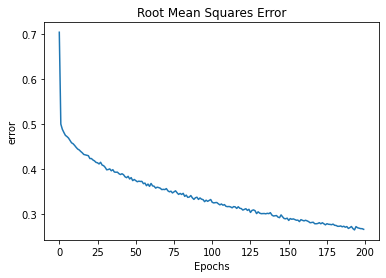

In [28]:
plt.plot(hist.history['root_mean_squared_error'])
#plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('Root Mean Squares Error')
plt.xlabel('Epochs')
plt.ylabel('error')
plt.show()

EVALUEATE THE MODEL


In [29]:
output_model.evaluate(X_train, y_train)

99/99 [==============================] - 0s 436us/step - loss: 0.0623 - root_mean_squared_error: 0.2496


[0.062305059283971786, 0.2496098130941391]

MEAN SQUARED ERROR FOR THE X_train 

In [31]:
from sklearn.metrics import mean_squared_error

y_pred = output_model.predict(X_test) # get model predictions (scaled inputs here)
y_pred_orig = sc_y.inverse_transform(y_pred) # unscale the predictions
y_test_orig = sc_y.inverse_transform(y_test) # unscale the true test outcomes

RMSE_orig = mean_squared_error(y_pred_orig, y_test_orig, squared=False)
RMSE_orig

441.5556614203359

MEAN SQUARED ERROR FOR y_train

In [33]:
train_pred = output_model.predict(X_train) # get model predictions (scaled inputs here)
train_pred_orig = sc_y.inverse_transform(train_pred) # unscale the predictions
y_train_orig = sc_y.inverse_transform(y_train) # unscale the true train outcomes

mean_squared_error(train_pred_orig, y_train_orig, squared=False)

233.38099000401542

In [ ]:
r2 score for y_train

In [34]:
from sklearn.metrics import r2_score
r2_score(y_pred_orig, y_test_orig)

0.7726997924673332

r2 score for X_train

In [35]:
r2_score(train_pred_orig, y_train_orig)

0.9325748491865057

In [36]:
np.concatenate((train_pred_orig, y_train_orig), 1)


array([[1391.93811035, 1485.1517    ],
       [ 221.86587524,  238.13972   ],
       [1812.52868652, 1662.2218    ],
       ...,
       [2396.67358398, 2766.8408    ],
       [ 907.88128662,  591.26963   ],
       [1482.60925293, 1004.3757    ]])

In [37]:
np.concatenate((y_pred_orig, y_test_orig), 1)

array([[2643.22119141, 2511.2375    ],
       [ 579.93902588,  480.20512   ],
       [1590.2421875 , 2017.5687    ],
       ...,
       [ 784.74963379,  523.50056   ],
       [2787.57226562, 2506.2019    ],
       [ 989.60534668,  484.93113   ]])

PLOTTING TEST DATA VS TRAINING DATA

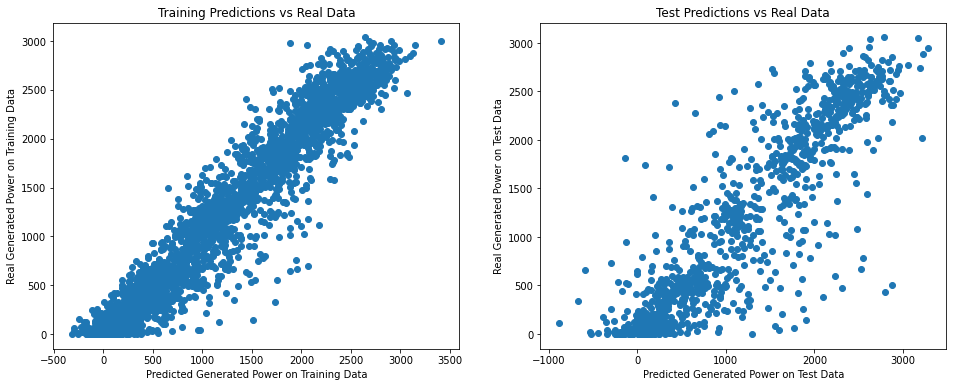

In [38]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,2)
plt.scatter(y_pred_orig, y_test_orig)
plt.xlabel('Predicted Generated Power on Test Data')
plt.ylabel('Real Generated Power on Test Data')
plt.title('Test Predictions vs Real Data')
#plt.scatter(y_test_orig, sc_X.inverse_transform(X_test)[:,2], color='green')
plt.subplot(1,2,1)
plt.scatter(train_pred_orig, y_train_orig)
plt.xlabel('Predicted Generated Power on Training Data')
plt.ylabel('Real Generated Power on Training Data')
plt.title('Training Predictions vs Real Data')
plt.show()

 SOLOR AZIMUTH TEST VS PREDICTED DATA

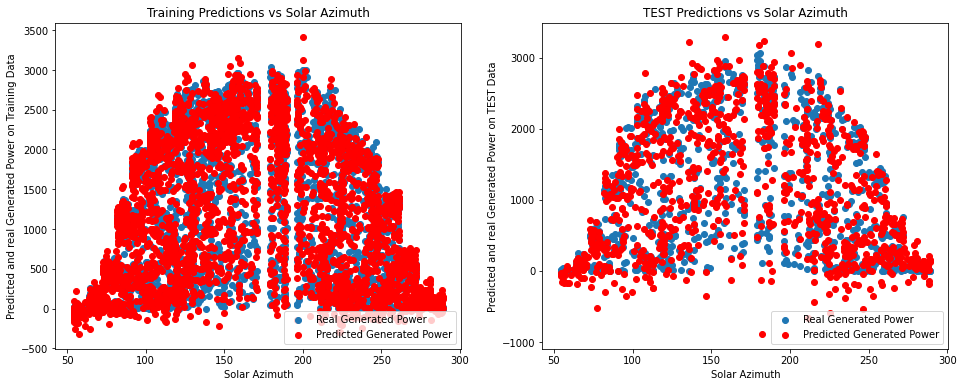

In [39]:
x_axis = sc_X.inverse_transform(X_train)[:,-1]
x2_axis = sc_X.inverse_transform(X_test)[:,-1]
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.scatter(x_axis, y_train_orig, label='Real Generated Power')
plt.scatter(x_axis, train_pred_orig, c='red', label='Predicted Generated Power')
plt.ylabel('Predicted and real Generated Power on Training Data')
plt.xlabel('Solar Azimuth')
plt.title('Training Predictions vs Solar Azimuth')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.scatter(x2_axis, y_test_orig, label='Real Generated Power')
plt.scatter(x2_axis, y_pred_orig, c='red', label='Predicted Generated Power')
plt.ylabel('Predicted and real Generated Power on TEST Data')
plt.xlabel('Solar Azimuth')
plt.title('TEST Predictions vs Solar Azimuth')
plt.legend(loc='lower right')
plt.show()

mean_sea_level_pressure_MSL TEST VS PREDICTED DATA

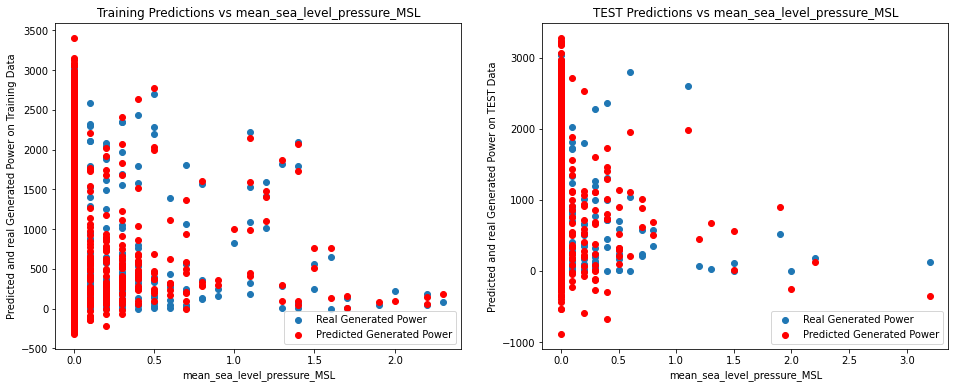

In [45]:
x_axis = sc_X.inverse_transform(X_train)[:,-17]
x2_axis = sc_X.inverse_transform(X_test)[:,-17]
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.scatter(x_axis, y_train_orig, label='Real Generated Power')
plt.scatter(x_axis, train_pred_orig, c='red', label='Predicted Generated Power')
plt.ylabel('Predicted and real Generated Power on Training Data')
plt.xlabel('mean_sea_level_pressure_MSL')
plt.title('Training Predictions vs mean_sea_level_pressure_MSL')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.scatter(x2_axis, y_test_orig, label='Real Generated Power')
plt.scatter(x2_axis, y_pred_orig, c='red', label='Predicted Generated Power')
plt.ylabel('Predicted and real Generated Power on TEST Data')
plt.xlabel('mean_sea_level_pressure_MSL')
plt.title('TEST Predictions vs mean_sea_level_pressure_MSL')
plt.legend(loc='lower right')
plt.show()

wind_speed_80_m_above_gnd TEST VS PREDICTED DATA

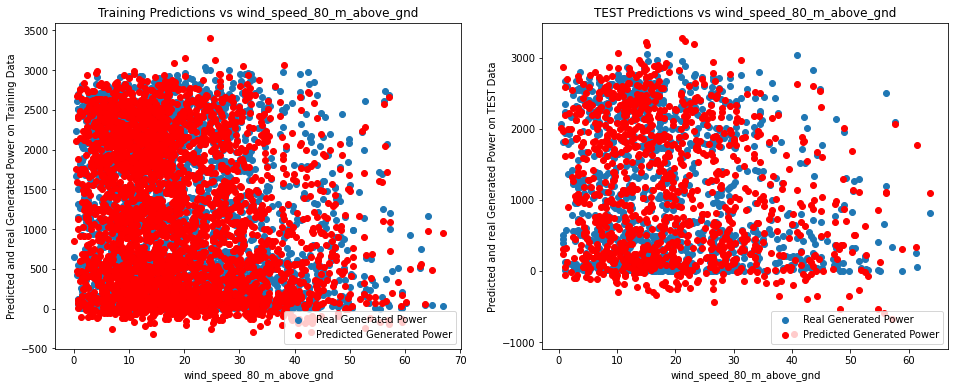

In [58]:
x_axis = sc_X.inverse_transform(X_train)[:,-8]
x2_axis = sc_X.inverse_transform(X_test)[:,-8]
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.scatter(x_axis, y_train_orig, label='Real Generated Power')
plt.scatter(x_axis, train_pred_orig, c='red', label='Predicted Generated Power')
plt.ylabel('Predicted and real Generated Power on Training Data')
plt.xlabel('wind_speed_80_m_above_gnd')
plt.title('Training Predictions vs wind_speed_80_m_above_gnd')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.scatter(x2_axis, y_test_orig, label='Real Generated Power')
plt.scatter(x2_axis, y_pred_orig, c='red', label='Predicted Generated Power')
plt.ylabel('Predicted and real Generated Power on TEST Data')
plt.xlabel('wind_speed_80_m_above_gnd')
plt.title('TEST Predictions vs wind_speed_80_m_above_gnd')
plt.legend(loc='lower right')
plt.show()

In [47]:
sc = StandardScaler()
pred_whole = output_model.predict(sc.fit_transform(X))
pred_whole_orig = sc_y.inverse_transform(pred_whole)
pred_whole_orig

array([[ 355.11563],
       [1434.2673 ],
       [2345.5308 ],
       ...,
       [ 248.25015],
       [ 311.2374 ],
       [ 164.32559]], dtype=float32)

In [48]:
y

array([[ 454.10095 ],
       [1411.9994  ],
       [2214.8493  ],
       ...,
       [ 158.36778 ],
       [ 126.95306 ],
       [  20.055031]])

In [49]:
r2_score(pred_whole_orig, y)

0.8887220876563594

In [50]:
df_results = pd.DataFrame.from_dict({
    'R2 Score of Whole Data Frame': r2_score(pred_whole_orig, y),
    'R2 Score of Training Set': r2_score(train_pred_orig, y_train_orig),
    'R2 Score of Test Set': r2_score(y_pred_orig, y_test_orig),
    'Mean of Test Set': np.mean(y_pred_orig),
    'Standard Deviation pf Test Set': np.std(y_pred_orig),
    'Relative Standard Deviation': np.std(y_pred_orig) / np.mean(y_pred_orig),
},orient='index', columns=['Value'])
display(df_results.style.background_gradient(cmap='afmhot', axis=0))

,Value
R2 Score of Whole Data Frame,0.888722
R2 Score of Training Set,0.932575
R2 Score of Test Set,0.772700
Mean of Test Set,1137.403809
Standard Deviation pf Test Set,926.158997
Relative Standard Deviation,0.814275


HEATMAP SHOWING FEATURE IMPORTANCE

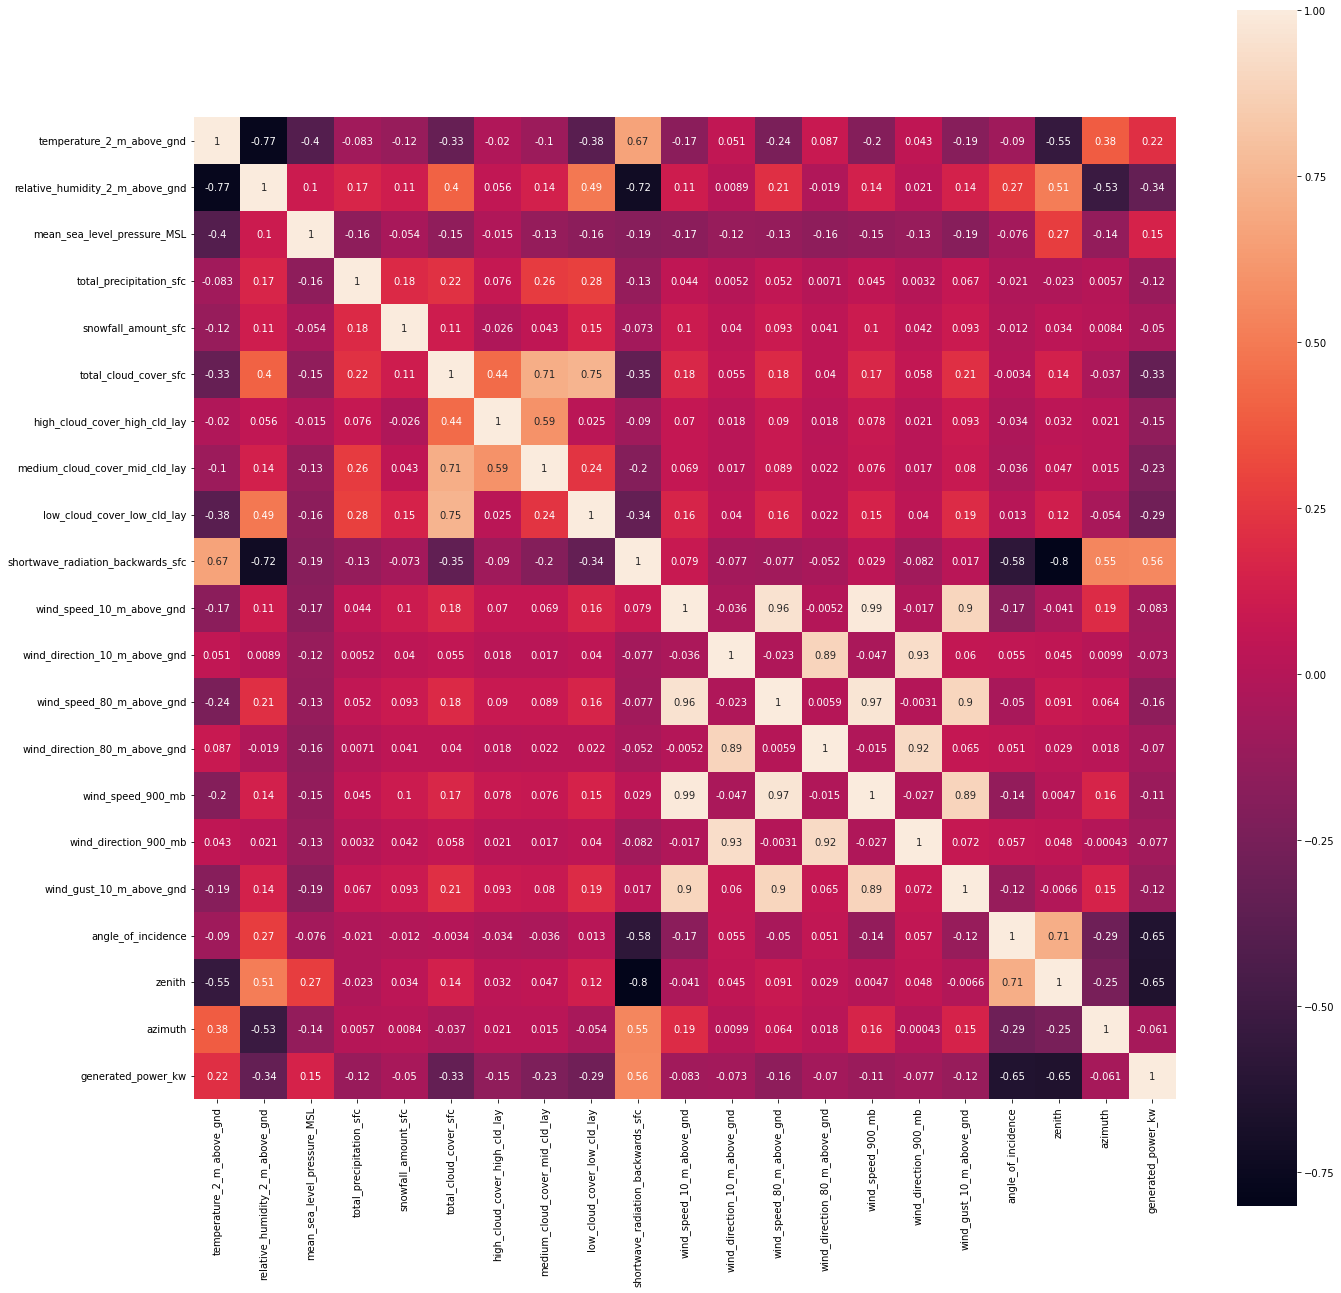

In [51]:
corr = dts.corr()
plt.figure(figsize=(22,22))
sns.heatmap(corr, annot=True, square=True);

In [52]:

from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.001)

lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

lasso_coeff = pd.DataFrame({'Feature Importance':lasso.coef_}, index=dts.columns[:-1])
lasso_coeff.sort_values('Feature Importance', ascending=False)

,Feature Importance
shortwave_radiation_backwards_sfc,0.379804
mean_sea_level_pressure_MSL,0.117743
wind_speed_80_m_above_gnd,0.072826
wind_speed_10_m_above_gnd,0.021176
snowfall_amount_sfc,0.015186
wind_direction_80_m_above_gnd,0.014985
wind_direction_10_m_above_gnd,0.011349
wind_direction_900_mb,-0.000000
total_precipitation_sfc,-0.004486
wind_gust_10_m_above_gnd,-0.034553


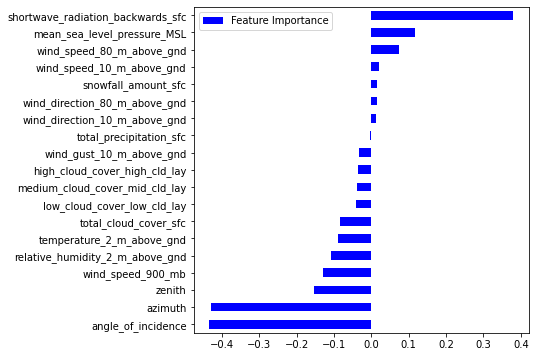

In [53]:
g = lasso_coeff[lasso_coeff['Feature Importance']!=0].sort_values('Feature Importance').plot(kind='barh',figsize=(6,6), cmap='winter')